In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install Sastrawi

plt.style.use('ggplot')
sns.set_style('whitegrid')

In [ ]:
import csv
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt_tab')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


pd.set_option('max_colwidth', 180)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df = pd.read_csv('/content/Eps8-Xiaomi2019.csv', sep=';', encoding='ISO-8859-1')
df.head()

,tweet,sentiment
0,pake hp xiaomi bisa kan,Positive
1,Xiaomi yi action kamera bagus juga buat video bisa di jadikan pertimbangan nihhh,Positive
2,Ya Allah jauhkanlah aku dari godaan clickbait line today dan berita-berita di browser xiaomi,Positive
3,hpmu opo se? kok sawangane jernih koyok iph â Xiaomi euy:' https://lap78.ask.fm/igoto/45DKECPW7B667HQMHN2IG6NM7SOD5OAUS7QPPAN4D7ROV45V2Q24OJAMGBFM2RRQK2272FYJJNWDWXQVYYU5Y25C...,Positive
4,numpang nanya itu hapenya xiaomi bukan ya? Kalo iya tipe apa? Jernih kameranya mirip iphone,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      101 non-null    object
 1   sentiment  101 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


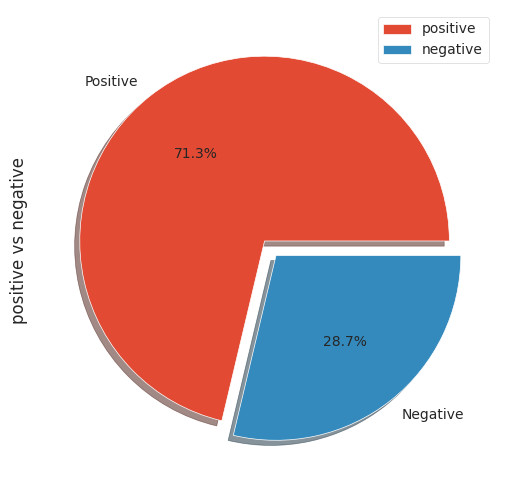

In [ ]:
df['sentiment'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel('positive vs negative')
plt.legend(['positive', 'negative'])
plt.show()

In [ ]:
df['length'] = df['tweet'].apply(len)
df.head()

,tweet,sentiment,length
0,pake hp xiaomi bisa kan,Positive,23
1,Xiaomi yi action kamera bagus juga buat video bisa di jadikan pertimbangan nihhh,Positive,80
2,Ya Allah jauhkanlah aku dari godaan clickbait line today dan berita-berita di browser xiaomi,Positive,92
3,hpmu opo se? kok sawangane jernih koyok iph â Xiaomi euy:' https://lap78.ask.fm/igoto/45DKECPW7B667HQMHN2IG6NM7SOD5OAUS7QPPAN4D7ROV45V2Q24OJAMGBFM2RRQK2272FYJJNWDWXQVYYU5Y25C...,Positive,309
4,numpang nanya itu hapenya xiaomi bukan ya? Kalo iya tipe apa? Jernih kameranya mirip iphone,Positive,91


In [ ]:
df['tweetLength'] = df['tweet'].apply(len)
df['tweetLength'].describe()

,tweetLength
count,101.00000
mean,76.80198
std,56.98895
min,7.00000
25%,36.00000
50%,60.00000
75%,99.00000
max,309.00000


In [ ]:
from wordcloud import WordCloud

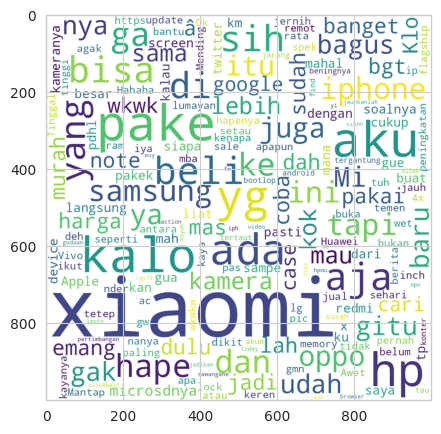

In [ ]:
wc=WordCloud(background_color='white', width=1000, height=1000).generate(' '.join(df['tweet']))
plt.figure(figsize =(5,5))
plt.imshow(wc)

In [ ]:
def clean_text(text):
    # mengubah semua karakter huruf menjadi huruf kecil
    text = text.lower()
    # menghilangkan Nama Akun
    text = re.sub(r"@\S+", '', text)
    # menghilangkan punctuation
    # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # menghilangkan angka
    text = re.sub(r"\w*\d\w*", '', text)
    # menghilangkan URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # menghilangkan Hashtag
    text = re.sub(r'#[^\s]+', '', text)
    # menghilangkan Huruf Tunggal
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    return text

clean = lambda x: clean_text(x)

In [ ]:
dfx = pd.DataFrame(df.tweet.apply(clean))
dfx

,tweet
0,pake hp xiaomi bisa kan
1,xiaomi yi action kamera bagus juga buat video bisa di jadikan pertimbangan nihhh
2,ya allah jauhkanlah aku dari godaan clickbait line today dan berita-berita di browser xiaomi
3,hpmu opo se? kok sawangane jernih koyok iph â xiaomi euy:' â¦
4,numpang nanya itu hapenya xiaomi bukan ya? kalo iya tipe apa? jernih kameranya mirip iphone
...,...
96,xiaomi bagus ka hehe
97,baru tahu kalo xiaomi bisa screen record wkwkwk
98,bgst mau nanya disini ada yg xiaomi mi susah cari sinyal ga semenjak update ke patch juni ?
99,"hp aku gitu dulu xiaomi, tapi ga sampe ke konter ku cari di google alhamdulillah bisa itu siapa tau bootlop nder kalo bootlop gausah ke konter:( sayang uangnya."


In [ ]:
def Punctuation(string):
  punctuations = '''!"#$%&'()*+,-./:;<=>?@[/]^_`{|}~'''
  for x in string.lower():
    if x in punctuations:
      string = string.replace(x, "")

  return(string)

cleanPunc = lambda x: Punctuation(x)

In [ ]:
dfx = pd.DataFrame(dfx.tweet.apply(cleanPunc))
dfx.head()

,tweet
0,pake hp xiaomi bisa kan
1,xiaomi yi action kamera bagus juga buat video bisa di jadikan pertimbangan nihhh
2,ya allah jauhkanlah aku dari godaan clickbait line today dan beritaberita di browser xiaomi
3,hpmu opo se kok sawangane jernih koyok iph â xiaomi euy â¦
4,numpang nanya itu hapenya xiaomi bukan ya kalo iya tipe apa jernih kameranya mirip iphone


In [ ]:
def get_stopword(stopwordsfile):
  stopwords=[]
  file_stopwords = open(stopwordsfile, 'r')
  row = file_stopwords.readline()
  while row:
    word = row.strip()
    stopwords.append(word)
    row = file_stopwords.readline()
  file_stopwords.close()
  return stopwords

In [ ]:
stop_words_indo = get_stopword('/content/Eps8-stopwordsindo.txt')

In [ ]:
def stopwords(text):
  tokens = word_tokenize(text)
  filtered = []

  for w in tokens:
    if w not in stop_words_indo:
      filtered.append(w)

  hasil = ' '.join(filtered)
  return hasil

st = lambda x: stopwords(x)

In [ ]:
dfx = pd.DataFrame(dfx.tweet.apply(st))
dfx.head()

,tweet
0,pake hp xiaomi
1,xiaomi yi action kamera bagus video jadikan pertimbangan nihhh
2,ya allah jauhkanlah godaan clickbait line today beritaberita browser xiaomi
3,hpmu opo sawangane jernih koyok iph â xiaomi euy â¦
4,numpang nanya hapenya xiaomi ya kalo iya tipe jernih kameranya iphone


In [ ]:
def stemming(text):
  factory_stem = StemmerFactory()
  stemmer = factory_stem.create_stemmer()
  text = stemmer.stem(text)
  return text

stem = lambda x: stemming(x)

dfx = pd.DataFrame(dfx.tweet.apply(stem))
dfx

,tweet
0,pake hp xiaomi
1,xiaomi yi action kamera bagus video jadi timbang nihhh
2,ya allah jauh goda clickbait line today beritaberita browser xiaomi
3,hpmu opo sawangane jernih koyok iph xiaomi euy
4,numpang nanya hapenya xiaomi ya kalo iya tipe jernih kamera iphone
...,...
96,xiaomi bagus ka hehe
97,kalo xiaomi screen record wkwkwk
98,bgst nanya yg xiaomi mi susah cari sinyal ga semenjak update patch juni
99,hp gitu xiaomi ga sampe konter ku cari google alhamdulillah tau bootlop nder kalo bootlop gausah konter sayang uang


In [ ]:
dfx["sentiment"] = df['sentiment']
dfx

,tweet,sentiment
0,pake hp xiaomi,Positive
1,xiaomi yi action kamera bagus video jadi timbang nihhh,Positive
2,ya allah jauh goda clickbait line today beritaberita browser xiaomi,Positive
3,hpmu opo sawangane jernih koyok iph xiaomi euy,Positive
4,numpang nanya hapenya xiaomi ya kalo iya tipe jernih kamera iphone,Positive
...,...,...
96,xiaomi bagus ka hehe,Positive
97,kalo xiaomi screen record wkwkwk,Positive
98,bgst nanya yg xiaomi mi susah cari sinyal ga semenjak update patch juni,Negative
99,hp gitu xiaomi ga sampe konter ku cari google alhamdulillah tau bootlop nder kalo bootlop gausah konter sayang uang,Negative


In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')

In [ ]:
from os import X_OK
y = dfx.sentiment
X = dfx.tweet

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [ ]:
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

mnb = MultinomialNB()

mnb.fit(X_train_vect, y_train)
y_pred = mnb.predict(X_test_vect)

accuracy_score(y_test, y_pred)

0.6774193548387096

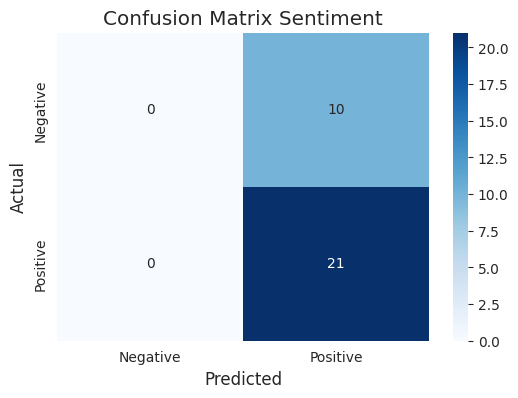

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mnb.classes_,yticklabels=mnb.classes_)
plt.title('Confusion Matrix Sentiment')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report:

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        10
    Positive       0.68      1.00      0.81        21

    accuracy                           0.68        31
   macro avg       0.34      0.50      0.40        31
weighted avg       0.46      0.68      0.55        31

ROC-AUC Score: 0.47


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


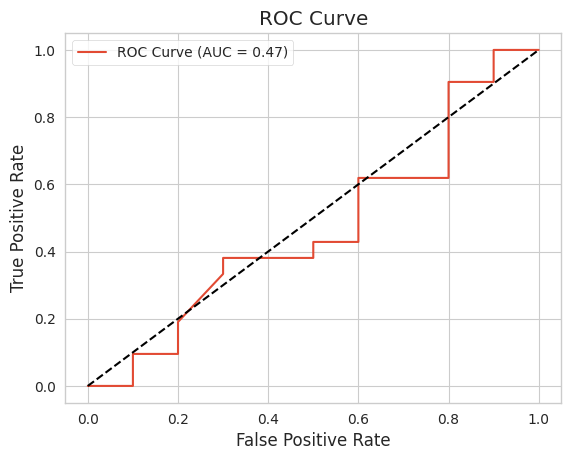

In [ ]:
print('Classification Report:\n')
print(classification_report(y_test, y_pred))

if len(mnb.classes_) == 2 :
  y_pred_proba = mnb.predict_proba(X_test_vect)[:, 1]
  auc_score = roc_auc_score(y_test, y_pred_proba)
  print(f'ROC-AUC Score: {auc_score:.2f}')

  fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='Positive')
  plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
  plt.plot([0,1], [0,1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

In [ ]:
pipeline = make_pipeline(TfidfVectorizer(use_idf=True, strip_accents='ascii'), MultinomialNB())

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print('Cross-Validation Scores (Accuracy per Fold) :', cv_scores)
print('Mean Accuracy:', cv_scores.mean())

Cross-Validation Scores (Accuracy per Fold) : [0.71428571 0.75       0.7        0.7        0.65      ]
Mean Accuracy: 0.702857142857143
